# <span style="color:black"> Esercitazioni - lezione 10 </span>

## <span style="color:black"> Esercizio 10.1 </span>

Un metodo per migliorare l'ottimizzazione del problema del commesso viaggiatore è quello di usare il metodo del Simulated Annealing (SA): l'idea consiste nell'interpretare la funzione costo $L^{(2)}(x)$, da ottimizzare, come l'energia del sistema. Nel momento in cui la temperatura tende a $0$ il sistema tenderà a stabilizzarsi nel minimo dell'energia, fornendo così l'ottimizzazione richiesta per la funzione costo. Si può quindi utilizzare l'algoritmmo di Metropolis, in grado di campionare la distribuzione di Boltzmann, proponendo mosse che verranno accettate con probabilità $\alpha=min\left\{1, e^{-\beta\left[ L^{(2)}(x')-L^{(2)}(x) \right]} \right\}$ al variare di $\beta$, visto come l'inverso della temperatura fittizia.  
Si noti che non è rilevante il fatto che in questo tipo  di sistemi, in cui la termeratura non è fissata ma varia, non valga il principio del bilancio dettagliato; infatti l'obiettivo non è campionare la specifica distribuzione ma solamente ottimizzare l' "energia". 

Per risolvere il problema del commesso viaggiatore si iniziato modificando il codice per l'algoritmo genetico dell'esercitazione 09, innanzitutto facendo variare la temperatura secondo una legge esponenziale negativa, la cui ragione è letta da file di input. Per ogni temperatura T vengono quindi eseguiti un numero di passi fissato da file di input, uguale per tutte le temperature. Si è poi implementato il campionamento tramite algoritmo di Metropolis come spiegato sopra.  
La scelta di una decrescita esponenziale della temperatura unita ad un numero costante di step Monte Carlo per ogni T, è  dovuta al tentativo di "rallentare" l'evoluzione del sistema man mano che le temperatura diminuisce, in modo da perdere l'ergodicità del sistema per evitare di convergere ad un minimo locale. 

E' necessario selezionare il range di temperature da esplorare: una buona regola per decidere quando fermarsi consiste nel considerare l'accettazione delle varie mosse (ovvero mutazioni) dell'algoritmo di Metropolis: essa diminuirà con la temperatura, quindi quando l'accettazione sarà prossima allo 0 sicuramente il sistema si sta stabilizzando e ulteriori mosse risultano poco efficaci.

Sono rappresentati nelle figure sottostanti i risultati ottenuti partendo da una temperatura $T=3$, e discendendo con ragione 2.1 per 30 passi, eseguendo 100 step Monte Carlo per ogni temperatura.

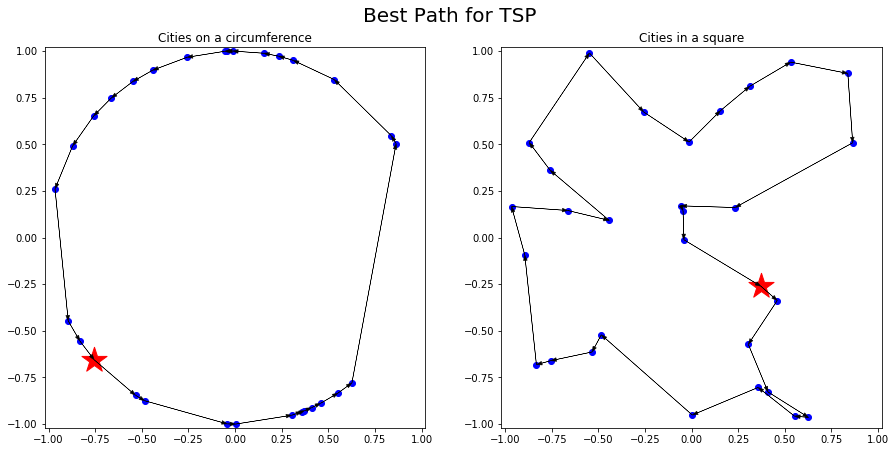

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

fig=plt.figure(figsize=(15, 7))
fig.suptitle('Best Path for TSP', y='0.96', size='20', weight='20')
gs = gridspec.GridSpec(1, 2, figure=fig)

x, y = np.loadtxt('CIRCLE/position.one', usecols=(0,1), unpack=True)
ax = fig.add_subplot(gs[0, 0])
for i in range(len(x)):
    if i==0:
        ax.scatter(x[i],y[i], marker='*', s=700, color='red')
    else:
        ax.scatter(x[i],y[i], color='blue')
    if i<len(x)-1:
        ax.arrow(x[i], y[i], x[i+1]-x[i], y[i+1]-y[i], width=0, head_width=0.02,length_includes_head=True, lw=0.5, fc="black", ec='black')
    else:
        ax.arrow(x[i], y[i], x[0]-x[i], y[0]-y[i], width=0, head_width=0.02,length_includes_head=True, lw=0.5, fc="black", ec='black')
ax.set_xlim(-1.02,1.02)
ax.set_ylim(-1.02,1.02)
plt.title("Cities on a circumference")

x, y = np.loadtxt('SQUARE/position.one', usecols=(0,1), unpack=True)
ax = fig.add_subplot(gs[0, 1])
for i in range(len(x)):
    if i==0:
        ax.scatter(x[i],y[i], marker='*', s=700, color='red')
    else:
        ax.scatter(x[i],y[i], color='blue')
    if i<len(x)-1:
        ax.arrow(x[i], y[i], x[i+1]-x[i], y[i+1]-y[i], width=0, head_width=0.02,length_includes_head=True, lw=0.5, fc="black", ec='black')
    else:
        ax.arrow(x[i], y[i], x[0]-x[i], y[0]-y[i], width=0, head_width=0.02,length_includes_head=True, lw=0.5, fc="black", ec='black')
ax.set_xlim(-1.02,1.02)
ax.set_ylim(-1.02,1.02)
plt.title("Cities in a square")

plt.show()

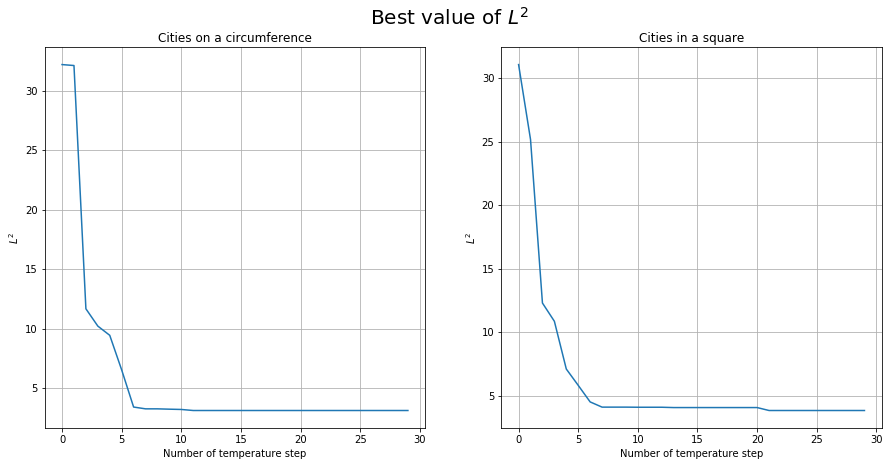

In [8]:
fig=plt.figure(figsize=(15, 7))
gs = gridspec.GridSpec(1, 2, figure=fig)
fig.suptitle(r'Best value of $L^{2}$', y='0.96', size='20', weight='20')

igen, Lbest = np.loadtxt('CIRCLE/output.lbest.0', usecols=(0,1), unpack='true')
ax = fig.add_subplot(gs[0, 0])
ax.plot(igen, Lbest);
ax.set_xlabel('Number of temperature step')
ax.set_ylabel(r'$L^{2}$')
plt.title("Cities on a circumference")
plt.grid()

igen, Lbest = np.loadtxt('SQUARE/output.lbest.0', usecols=(0,1), unpack='true')
ax = fig.add_subplot(gs[0, 1])
ax.plot(igen, Lbest);
ax.set_xlabel('Number of temperature step')
ax.set_ylabel(r'$L^{2}$')
plt.title("Cities in a square")
plt.grid()
plt.show()

Si nota che per le città disposte su una circonferenza la convergenza al miglior cammino si raggiunge già in 10 step di temperatura, mentre per le città all'interno di un quadrato sono nnecessari ulteriori 10 step per "uscire" da una buca rappresentante un minimo locale dell' "energia".

## Es 10.2: 4 core in parallelo

Si è provato a risolvere lo stesso problema del punto precedente anche utilizzando più core in parallelo, in particolare sono stati usati 4 core. E' stata utilizzata la libreria MPI: il codice di ottimizzazione viene eseguito per ogni core indipendentemente, e alla fine vengono confrontati i risultati. Oltre a questo, è stato necessario permettere alcuni tipi di comunicazione affinchè i core potessero affrontare il medesimo problema nelle condizioni ottimali: per prima cosa si noti che è necessario che la configurazione delle città sia la medesima per tutti i core; per fare questo si è scelto di generare una sola volta la posizione delle città con il core "0", e poi utilizzare il comando  <font face = "Courier"> `MPI_Bcast` </font> per trasmettere tale configurazione agli altri core.  
Un' altra comunicazione significativa tra i core avviene periodicamente ogni volta che la temperatura viene abbassata: dopo aver eseguito tutte le mutazioni necessarie utilizzando l'algoritmo di Metropolis su ogni core, è stato utilizzato il comando <font face = "Courier"> `MPI_Reduce` </font> per salvare sul core "0" il miglior percorso trovato tra tutti i core. E' lecito dunque aspettarsi che il core numero "0" presenterà la convergenza più veloce, in quanto risulta racchiudere i migliori percorsi di tutti gli altri core. 

Nei grafici sottostanti sono presentati i risultati ottenuti paragonando i vari core per le due configurazioni di città implementate nel codice. E' inoltre presentato, nell'ultimo grafico, l'andamento della funzione costo per il migliore percorso trovato tra tutti i core, da confrontare con l'ultimo grafico del punto precedente: si nota che utilizzando più core è più facile, nel caso di città distribuite in un quadrato, uscire dal minimo locale, per cui la convergenza in questo caso risulta più veloce.

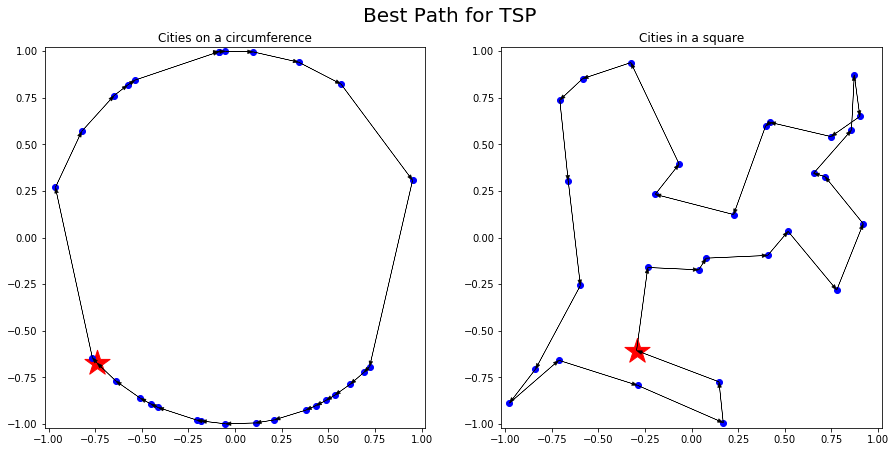

In [9]:
fig=plt.figure(figsize=(15, 7))
fig.suptitle('Best Path for TSP', y='0.96', size='20', weight='20')
gs = gridspec.GridSpec(1, 2, figure=fig)

x, y = np.loadtxt('CIRCLE/position.0', usecols=(0,1), unpack=True)
ax = fig.add_subplot(gs[0, 0])
for i in range(len(x)):
    if i==0:
        ax.scatter(x[i],y[i], marker='*', s=700, color='red')
    else:
        ax.scatter(x[i],y[i], color='blue')
    if i<len(x)-1:
        ax.arrow(x[i], y[i], x[i+1]-x[i], y[i+1]-y[i], width=0, head_width=0.02,length_includes_head=True, lw=0.5, fc="black", ec='black')
    else:
        ax.arrow(x[i], y[i], x[0]-x[i], y[0]-y[i], width=0, head_width=0.02,length_includes_head=True, lw=0.5, fc="black", ec='black')
ax.set_xlim(-1.02,1.02)
ax.set_ylim(-1.02,1.02)
plt.title("Cities on a circumference")

x, y = np.loadtxt('SQUARE/position.0', usecols=(0,1), unpack=True)
ax = fig.add_subplot(gs[0, 1])
for i in range(len(x)):
    if i==0:
        ax.scatter(x[i],y[i], marker='*', s=700, color='red')
    else:
        ax.scatter(x[i],y[i], color='blue')
    if i<len(x)-1:
        ax.arrow(x[i], y[i], x[i+1]-x[i], y[i+1]-y[i], width=0, head_width=0.02,length_includes_head=True, lw=0.5, fc="black", ec='black')
    else:
        ax.arrow(x[i], y[i], x[0]-x[i], y[0]-y[i], width=0, head_width=0.02,length_includes_head=True, lw=0.5, fc="black", ec='black')
ax.set_xlim(-1.02,1.02)
ax.set_ylim(-1.02,1.02)
plt.title("Cities in a square")

plt.show()

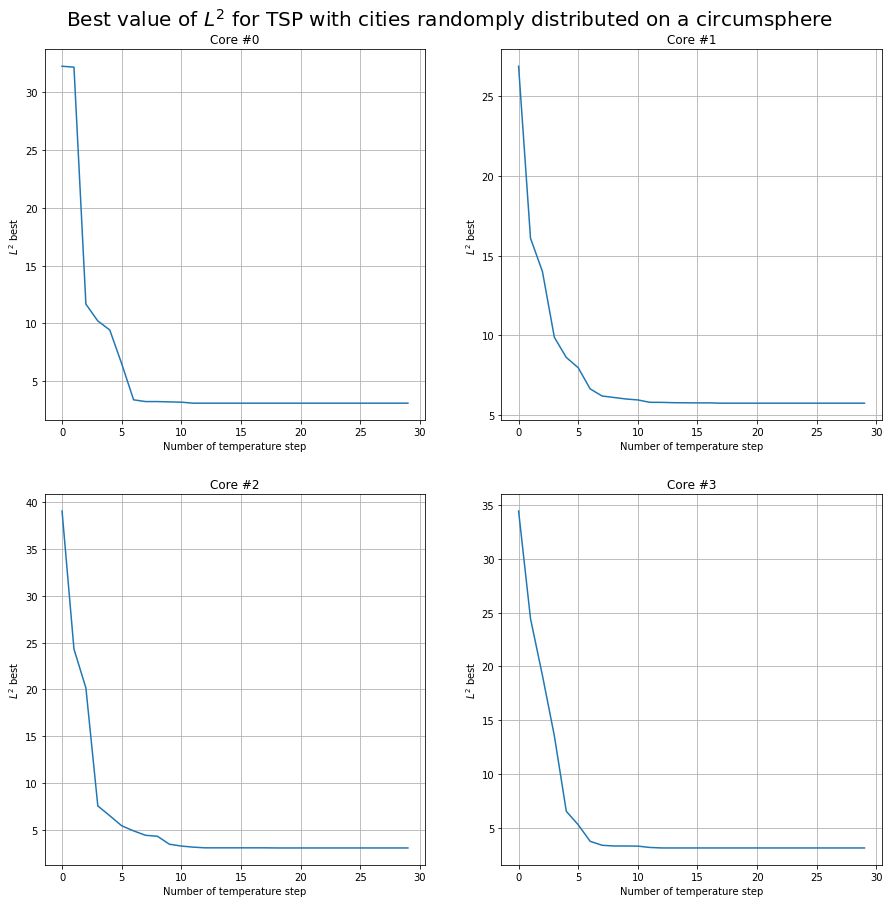

In [10]:
fig=plt.figure(figsize=(15, 15))
fig.suptitle(r'Best value of $L^{2}$ for TSP with cities randomply distributed on a circumsphere', y='0.92', size='20', weight='20')
gs = gridspec.GridSpec(2, 2, figure=fig)

igen0, Lbest0 = np.loadtxt('CIRCLE/output.lbest.0', usecols=(0,1), unpack='true')
ax = fig.add_subplot(gs[0, 0])
ax.plot(igen0, Lbest0);
ax.set_xlabel('Number of temperature step')
ax.set_ylabel(r'$L^{2}$ best')
plt.title("Core #0")
plt.grid()
#ax.ylim(3.5, 3.8)

igen, Lbest = np.loadtxt('CIRCLE/output.lbest.1', usecols=(0,1), unpack='true')
ax1 = fig.add_subplot(gs[0, 1])
ax1.plot(igen, Lbest);
ax1.set_xlabel('Number of temperature step')
ax1.set_ylabel(r'$L^{2}$ best')
plt.title("Core #1")
plt.grid()

igen, Lbest = np.loadtxt('CIRCLE/output.lbest.2', usecols=(0,1), unpack='true')
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(igen, Lbest);
ax2.set_xlabel('Number of temperature step')
ax2.set_ylabel(r'$L^{2}$ best')
plt.title("Core #2")
plt.grid()

igen, Lbest = np.loadtxt('CIRCLE/output.lbest.3', usecols=(0,1), unpack='true')
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(igen, Lbest);
ax3.set_xlabel('Number of temperature step')
ax3.set_ylabel(r'$L^{2}$ best')
plt.title("Core #3")
plt.grid()

plt.show()

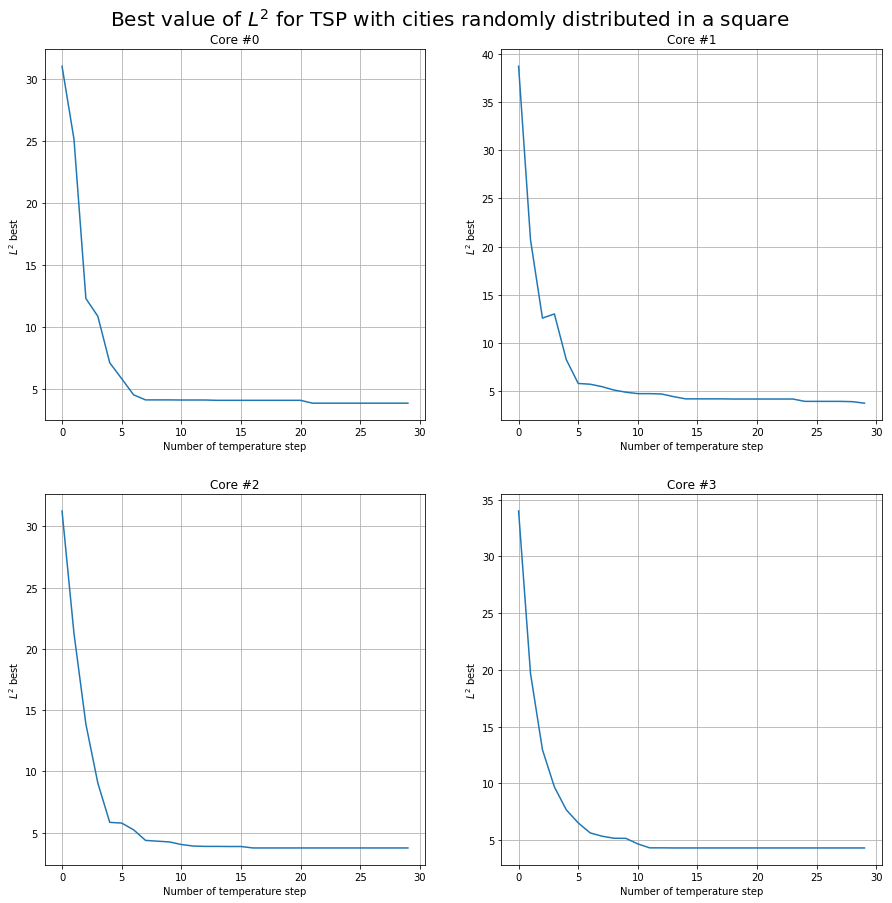

In [11]:
fig=plt.figure(figsize=(15, 15))
fig.suptitle(r'Best value of $L^{2}$ for TSP with cities randomly distributed in a square', y='0.92', size='20', weight='20')
gs = gridspec.GridSpec(2, 2, figure=fig)

igen0, Lbest0 = np.loadtxt('SQUARE/output.lbest.0', usecols=(0,1), unpack='true')
ax = fig.add_subplot(gs[0, 0])
ax.plot(igen0, Lbest0);
ax.set_xlabel('Number of temperature step')
ax.set_ylabel(r'$L^{2}$ best')
plt.title("Core #0")
plt.grid()
#ax.ylim(3.5, 3.8)

igen, Lbest = np.loadtxt('SQUARE/output.lbest.1', usecols=(0,1), unpack='true')
ax1 = fig.add_subplot(gs[0, 1])
ax1.plot(igen, Lbest);
ax1.set_xlabel('Number of temperature step')
ax1.set_ylabel(r'$L^{2}$ best')
plt.title("Core #1")
plt.grid()

igen, Lbest = np.loadtxt('SQUARE/output.lbest.2', usecols=(0,1), unpack='true')
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(igen, Lbest);
ax2.set_xlabel('Number of temperature step')
ax2.set_ylabel(r'$L^{2}$ best')
plt.title("Core #2")
plt.grid()

igen, Lbest = np.loadtxt('SQUARE/output.lbest.3', usecols=(0,1), unpack='true')
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(igen, Lbest);
ax3.set_xlabel('Number of temperature step')
ax3.set_ylabel(r'$L^{2}$ best')
plt.title("Core #3")
plt.grid()

plt.show()

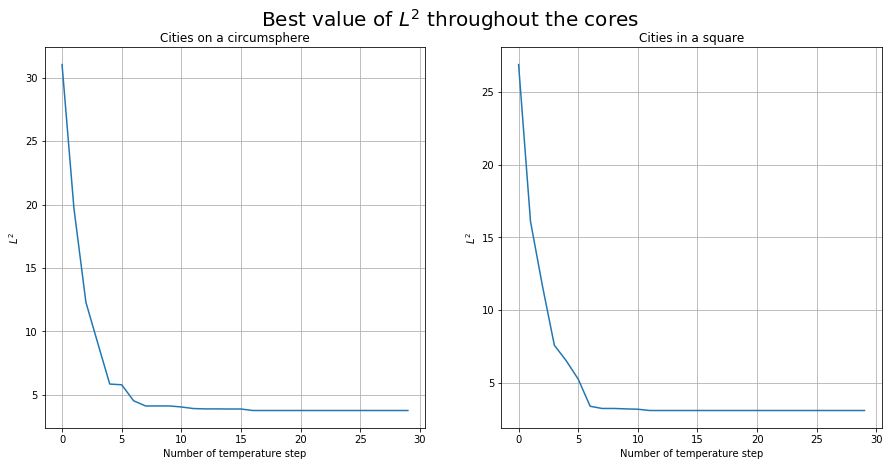

In [12]:
fig=plt.figure(figsize=(15, 7))
gs = gridspec.GridSpec(1, 2, figure=fig)
fig.suptitle(r'Best value of $L^{2}$ throughout the cores', y='0.96', size='20', weight='20')

igen, Lbest = np.loadtxt('SQUARE/output.absbest.0', usecols=(0,1), unpack='true')
ax = fig.add_subplot(gs[0, 0])
ax.plot(igen, Lbest);
ax.set_xlabel('Number of temperature step')
ax.set_ylabel(r'$L^{2}$')
plt.title("Cities on a circumsphere")
plt.grid()

igen, Lbest = np.loadtxt('CIRCLE/output.absbest.0', usecols=(0,1), unpack='true')
ax = fig.add_subplot(gs[0, 1])
ax.plot(igen, Lbest);
ax.set_xlabel('Number of temperature step')
ax.set_ylabel(r'$L^{2}$')
plt.title("Cities in a square")
plt.grid()
plt.show()